# Import Libraries

In [1]:
import yt
import numpy as np
import itertools
from IPython.core.display import Image
from yt.visualization.volume_rendering.api import Scene, VolumeSource, OpaqueSource, PointSource, LineSource

# Paths of Data Files

In [2]:
hyd_file_path = 'test_data_set/profile_ev0_binary.dat'
jet_file_path = 'test_data_set/final_parton_list_evolution_history_ev0.txt'

# Load Hydro Profile

In [3]:
hyd_data = np.fromfile(hyd_file_path,  dtype=np.float32)
hyd_data = hyd_data.reshape(-1, 16)

t_h_list = np.unique(hyd_data[:, 0])
x_h_list = np.unique(hyd_data[:, 1])
y_h_list = np.unique(hyd_data[:, 2])
z_h_list = np.unique(hyd_data[:, 3])

dt_h = t_h_list[1]-t_h_list[0]

n_t_h = len(t_h_list)
n_x_h =  len(x_h_list)
n_y_h = len(y_h_list)
n_z_h = len(z_h_list)

eden = np.zeros([n_t_h, n_x_h, n_y_h, n_z_h])
eden_bcg = hyd_data[0, 9]

for it, t in enumerate(t_h_list):
    idx = (hyd_data[:, 0] == t)
    hyd_at_t = hyd_data[idx, :]

    igrid = 0
    for ix, iy, iz in itertools.product(range(n_x_h),range(n_y_h),range(n_z_h)):
        eden[it, ix, iy, iz] = hyd_at_t[igrid, 9]
        igrid +=1

del hyd_data

# Load Jet Shower Evolution

In [4]:
jet_data = np.loadtxt(jet_file_path)
t_particle_list = np.unique(jet_data[:, 0])

# 3D Rendering for Hydro+Jet with yt project

## t=0.0 ###########################################
## t=0.1 ###########################################
## t=0.2 ###########################################
## t=0.3 ###########################################
## t=0.4 ###########################################
## t=0.5 ###########################################
## t=0.6 ###########################################
## t=0.7 ###########################################
## t=0.8 ###########################################
## t=0.9 ###########################################
## t=1.0 ###########################################
## t=1.1 ###########################################
## t=1.2 ###########################################
## t=1.3 ###########################################
## t=1.4 ###########################################
## t=1.5 ###########################################
## t=1.6 ###########################################
## t=1.7 ###########################################
## t=1.8 #####################################

yt : [INFO     ] 2020-05-20 12:37:57,554 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-05-20 12:37:57,555 Parameters: domain_dimensions         = [160  80  80]
yt : [INFO     ] 2020-05-20 12:37:57,557 Parameters: domain_left_edge          = [-19.875  -9.875  -9.875]
yt : [INFO     ] 2020-05-20 12:37:57,557 Parameters: domain_right_edge         = [19.875  9.875  9.875]
yt : [INFO     ] 2020-05-20 12:37:57,558 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2020-05-20 12:37:57,840 Rendering scene (Can take a while).
yt : [INFO     ] 2020-05-20 12:37:57,847 Creating volume
yt : [INFO     ] 2020-05-20 12:39:17,374 Saving render ./test_results/hyd_jet_10.1.png


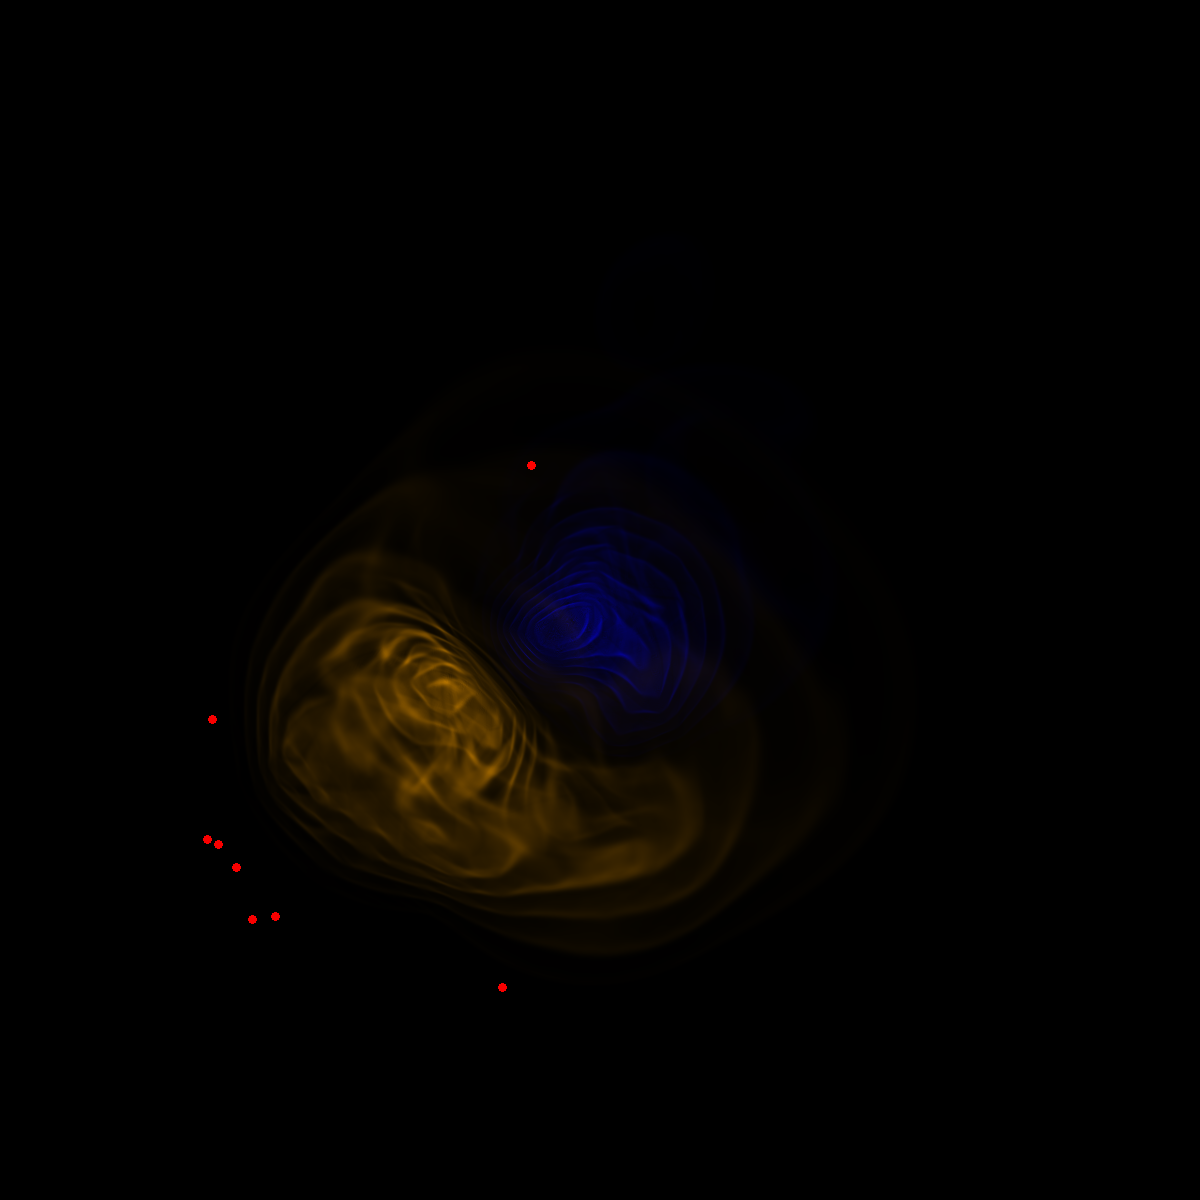

In [5]:
for itp, tp in enumerate(t_particle_list):
    
    print('## t='+str(tp)+' ###########################################')
    
    idx_jet = (jet_data[:, 0] == tp)
    jet_data_at_t = jet_data[idx_jet, :]

    itm_list = np.where( (t_h_list <= tp) & (t_h_list > tp - dt_h) )
    if itp == 0:
        itm_list = np.where(t_h_list == tp)

    itm = itm_list[0][0]
    
    # please comment out below to get all snapshots during evolution
    if tp <= 10:
        continue
    ##########################################################
    # Redering Part
    ##########################################################
        
    dat = dict(density=(eden[itm, :, :, :]))
    bbox = np.array([[x_h_list[0], x_h_list[-1]], [y_h_list[0], y_h_list[-1]], [z_h_list[0], z_h_list[-1]]])
    ds = yt.load_uniform_grid(dat, eden[itm, :, :, :].shape, bbox=bbox, nprocs=64)
    
    mi, ma = ds.all_data().quantities.extrema('density')
    bounds = (mi.value,ma.value)
    
    sc = Scene()

    HYD = VolumeSource(ds,field='density')
    HYD.set_log(True)
    HYD_tf = yt.ColorTransferFunction(np.log10(bounds))
    
    width = 0.00002*(np.log(bounds[1])-np.log(eden_bcg))
    if tp > 3.4:
        HYD_tf.add_gaussian(np.log10(eden_bcg), width, [0.61, 0.39, 0.0, 0])
        HYD_tf.add_gaussian( 0.9*np.log10(eden_bcg) + 0.1*np.log10(bounds[1]) , width, [0.61, 0.39, 0.0, 0.1*0.1])
    if tp >= 3.0:
        HYD_tf.add_gaussian( 0.8*np.log10(eden_bcg) + 0.2*np.log10(bounds[1]) , width, [0.61, 0.39, 0.0, 0.2*0.2])
    HYD_tf.add_gaussian( 0.7*np.log10(eden_bcg) + 0.3*np.log10(bounds[1]) , width, [0.61, 0.39, 0.0, 0.3*0.3])
    HYD_tf.add_gaussian( 0.6*np.log10(eden_bcg) + 0.4*np.log10(bounds[1]) , width, [0.61, 0.39, 0.0, 0.4*0.4])
    HYD_tf.add_gaussian( 0.5*np.log10(eden_bcg) + 0.5*np.log10(bounds[1]) , width, [0.61, 0.39, 0.0, 0.5*0.5])
    HYD_tf.add_gaussian( 0.4*np.log10(eden_bcg) + 0.6*np.log10(bounds[1]) , width, [0.61, 0.39, 0.0, 0.6*0.6])
    HYD_tf.add_gaussian( 0.3*np.log10(eden_bcg) + 0.7*np.log10(bounds[1]) , width, [0.61, 0.39, 0.0, 0.7*0.7])
    HYD_tf.add_gaussian( 0.2*np.log10(eden_bcg) + 0.8*np.log10(bounds[1]) , width, [0.61, 0.39, 0.0, 0.8*0.8])
    HYD_tf.add_gaussian( 0.1*np.log10(eden_bcg) + 0.9*np.log10(bounds[1]) , width, [0.61, 0.39, 0.0, 0.9*0.9])
    HYD_tf.add_gaussian(np.log10(bounds[1]), width, [0.61, 0.39, 0.0, 1.0])

    width = 0.0000075*(np.log(eden_bcg)-np.log(bounds[0]))
    HYD_tf.add_gaussian(np.log10(eden_bcg), width, [0.0, 0.0, 1.0, 0])
    if tp > 3.4:
        HYD_tf.add_gaussian( 0.9*np.log10(eden_bcg) + 0.1*np.log10(bounds[0]) , width, [0.0, 0.0, 1.0, 0.1*0.1])
    if tp >= 3.0:
        HYD_tf.add_gaussian( 0.8*np.log10(eden_bcg) + 0.2*np.log10(bounds[0]) , width, [0.0, 0.0, 1.0, 0.2*0.2])
    HYD_tf.add_gaussian( 0.7*np.log10(eden_bcg) + 0.3*np.log10(bounds[0]) , width, [0.0, 0.0, 1.0, 0.3*0.3])
    HYD_tf.add_gaussian( 0.6*np.log10(eden_bcg) + 0.4*np.log10(bounds[0]) , width, [0.0, 0.0, 1.0, 0.4*0.4])
    HYD_tf.add_gaussian( 0.5*np.log10(eden_bcg) + 0.5*np.log10(bounds[0]) , width, [0.0, 0.0, 1.0, 0.5*0.5])
    HYD_tf.add_gaussian( 0.4*np.log10(eden_bcg) + 0.6*np.log10(bounds[0]) , width, [0.0, 0.0, 1.0, 0.6*0.6])
    HYD_tf.add_gaussian( 0.3*np.log10(eden_bcg) + 0.7*np.log10(bounds[0]) , width, [0.0, 0.0, 1.0, 0.7*0.7])
    HYD_tf.add_gaussian( 0.2*np.log10(eden_bcg) + 0.8*np.log10(bounds[0]) , width, [0.0, 0.0, 1.0, 0.8*0.8])
    HYD_tf.add_gaussian( 0.1*np.log10(eden_bcg) + 0.9*np.log10(bounds[0]) , width, [0.0, 0.0, 1.0, 0.9*0.9])
    HYD_tf.add_gaussian(np.log10(bounds[0]), width, [0.0, 0.0, 0.0, 1.0])

    HYD.tfh.tf = HYD_tf
    
    vertices = jet_data_at_t[:,5:8]
    colors = np.ones([len(vertices[:,0]),4])
    pid = jet_data_at_t[:,3]
    
    colors[:,0] = 1
    colors[:,1] = 0
    colors[:,2] = 0
    colors[:,3] = 0.01    
    
#     colors[pid==21,0] = 1
#     colors[pid==21,1] = 1
#     colors[pid==21,2] = 1
    
#     colors[pid<0,0] = 1
#     colors[pid<0,1] = 1
#     colors[pid<0,2] = 1
    
    
    JET = PointSource(vertices, colors=colors, radii=4)
    
    sc.add_source(HYD)
    sc.add_source(JET)
    
    cam = sc.add_camera(ds, lens_type='perspective')



    sc.camera.focus = ds.domain_center
    sc.camera.position = [0.2, 0.2, 0.2]
    
    sc.camera.resolution = [1200, 1200]

    sc.save('./test_results/hyd_jet_'+str(tp)+'.png',sigma_clip=4)
    sc.show()
    
    ############################################################################################################

# Create GIF Animation

In [6]:
pic_list = []
for itp, tp in enumerate(t_particle_list):
    name = 'hyd_jet_'+str(tp)+'.png'
    pic_list.append(name)

    from subprocess import Popen
    command = ['convert', '-dispose', 'none', '-coalesce', '-loop', '0', '-delay', '5']
    command.extend(pic_list)
    command.append('./test_results/hyd_jet.gif')
#print(command)
Popen(command)